# 比率の差の検定(Ztest)
## 帰無仮説
- 施策の効果はなかった。つまり確率p1-p2=0
## 対立仮説
- 施策に効果はあった。p1<p2で施策後の確率が大きく p1 - p2は負の値を取るため下側検定と言える

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import iqr
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.api import qqplot
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
df = sns.load_dataset('tips')

df['tip_rate'] = df['tip'] / df['total_bill']

In [54]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# アクティブユーザー数
user_before = 550
user_after = 700

# 標本の大きさ
n = 1500

# Zテストの実行、alternativeの引数'smaller'は下側検定
stat, p_value = proportions_ztest([user_before, user_after], [n, n], alternative='smaller')

# 有意水準
alpha = 0.05

# 結果の表示
if p_value < alpha:
    print("帰無仮説を棄却し、対立仮説を採用します。")
else:
    print("帰無仮説を採用します。")


帰無仮説を棄却し、対立仮説を採用します。


In [55]:
p_value

1.3886899053083603e-08

提供していただいた数値 1.3886899053083603e-08 は、非常に小さな値です。これは指数表記（科学的な表記法）であり、e-08 は 10 の -8 乗を表します。つまり、この数値は非常に小さな確率を示しています。

この場合、p_value が 1.3886899053083603e-08 であるということは、帰無仮説に従ったデータが観測される確率が非常に低いことを意味します。有意水準を通常の 0.05 と比較すると、 1.3886899053083603e-08 は非常に小さいため、統計的に有意となります。したがって、この値をもとに判断すると、帰無仮説は棄却され、対立仮説が採用される可能性が高いです。

簡単に言うと、非常に小さな p_value は、結果が偶然ではなく統計的に有意であることを示すものです。

# 統計的に有意であるため施策は効果があったと言える

# 平均値差の検定

In [56]:
# ステューデントのt検定
stats.ttest_ind(df['tip'],df['tip'],equal_var=True)

TtestResult(statistic=0.0, pvalue=1.0, df=486.0)

In [57]:
# ウェルチのt検定
stats.ttest_ind(df['tip'],df['tip'],equal_var=False)

TtestResult(statistic=0.0, pvalue=1.0, df=486.00000000000006)

In [58]:
n = 50
sample_df1 = df.sample(n)
sample_df2 = df.sample(n)

In [59]:
# ステューデントのt検定
stats.ttest_ind(sample_df1['tip'],sample_df2['tip'],equal_var=True)

TtestResult(statistic=0.4942750539819416, pvalue=0.6222180839245994, df=98.0)

In [60]:
# ウェルチのt検定
stats.ttest_ind(sample_df1['tip'],sample_df2['tip'],equal_var=False)

TtestResult(statistic=0.4942750539819415, pvalue=0.6222677583729159, df=93.78143205702463)

## 平均値差の検定

In [61]:
female_tip_rate = df[df['sex']=='Female']['tip_rate']
male_tip_rate = df[df['sex']=='Male']['tip_rate']

## 男性と女性のチップ割合に差があるかどうかを検定したい

In [62]:
print(np.mean(female_tip_rate), np.mean(male_tip_rate))

0.16649073632892478 0.15765054700429743


In [63]:
print(np.var(male_tip_rate), np.var(female_tip_rate))

0.004169445577529409 0.00284330042554882


In [64]:
# ステューデントのt検定
stats.ttest_ind(male_tip_rate,female_tip_rate,equal_var=True)

TtestResult(statistic=-1.0833972270477996, pvalue=0.2797103849605489, df=242.0)

In [65]:
# ウェルチのt検定
stats.ttest_ind(male_tip_rate,female_tip_rate,equal_var=False)

TtestResult(statistic=-1.1432770167349968, pvalue=0.2542456188927583, df=206.75874799951296)

/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


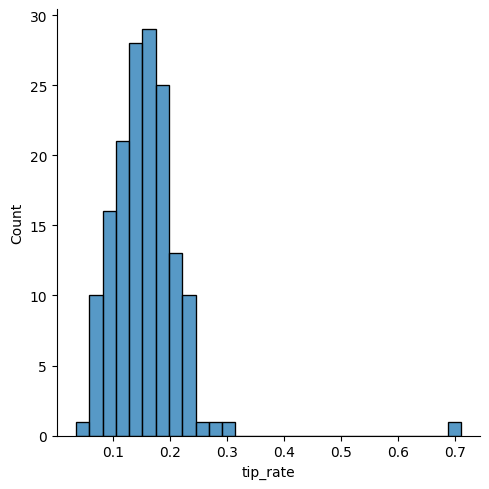

In [66]:
sns.displot(male_tip_rate)

/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


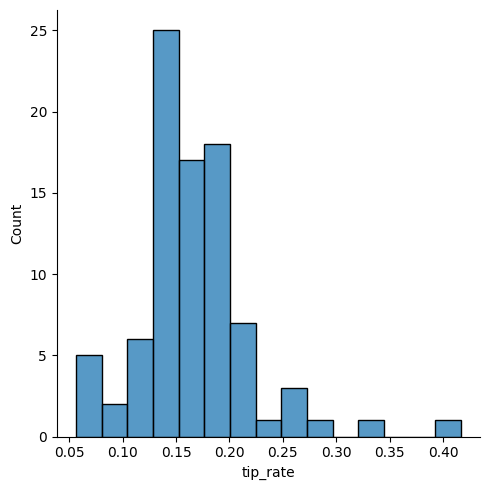

In [67]:
sns.displot(female_tip_rate)

<Axes: xlabel='sex', ylabel='tip_rate'>

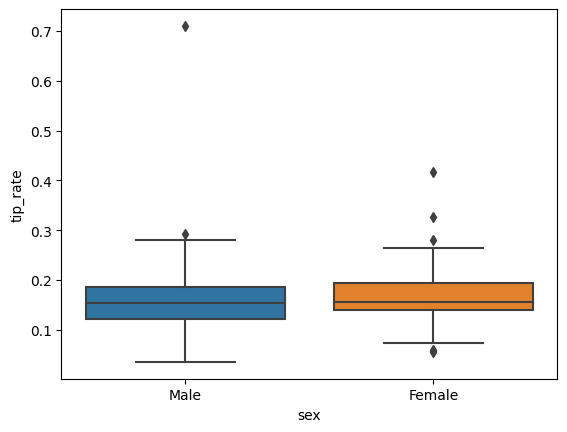

In [68]:
sns.boxplot(data=df, x='sex', y='tip_rate')

## 対応のない平均値差の検定（t検定）
- 全く連動していない別々の平均値の検定をしたい場合に使用する

In [69]:
print(len(male_tip_rate), len(female_tip_rate))

157 87


# Q-Qプロット

In [70]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [77]:
male_tipr = df[df['sex']=='Male']['tip_rate']

In [89]:
female_tipr = df[df['sex']=='Female']['tip_rate']

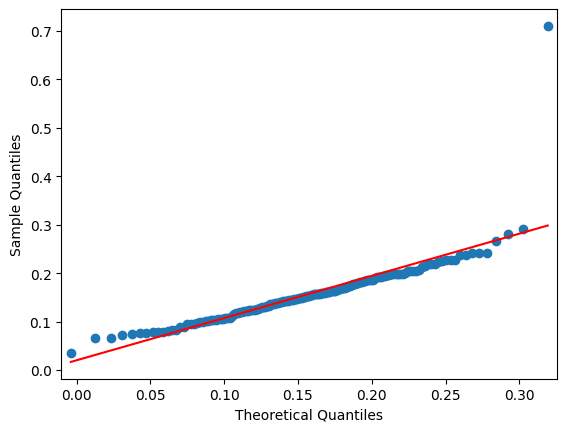

In [87]:
fig = qqplot(male_tipr,
            line='r',
            dist=stats.norm(loc=np.mean(male_tipr), scale=np.sqrt(stats.tvar(male_tipr))))

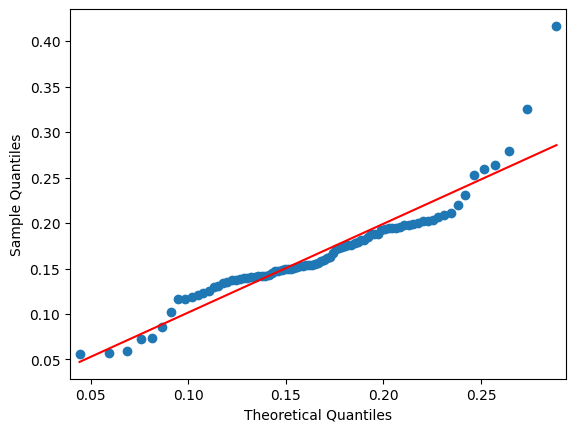

In [88]:
fig = qqplot(female_tipr,
            line='r',
            dist=stats.norm(loc=np.mean(female_tipr), scale=np.sqrt(stats.tvar(female_tipr))))

# シャピロウィルクの検定

In [92]:
stats.shapiro(male_tipr)

ShapiroResult(statistic=0.7447848916053772, pvalue=3.2243768151486588e-15)

In [93]:
stats.shapiro(female_tipr)

ShapiroResult(statistic=0.8982975482940674, pvalue=4.718069249065593e-06)

In [96]:
# 外れ値を取り除く
stats.shapiro(np.sort(male_tipr)[:-1])

ShapiroResult(statistic=0.9931070804595947, pvalue=0.6644759774208069)

In [100]:
# 外れ値を取り除く
stats.shapiro(np.sort(female_tipr)[:-2])

ShapiroResult(statistic=0.9696651697158813, pvalue=0.04252713546156883)

In [105]:
# IQR法で外れ値を取り除いてみる
Q1 = np.percentile(female_tipr, 25)
Q3 = np.percentile(female_tipr, 75)
iqr_value = iqr(female_tipr)
lower_bound = Q1 - 1.5 * iqr_value
upper_bound = Q3 + 1.5 * iqr_value

filtered_female_tipr = female_tipr[(female_tipr >= lower_bound) & (female_tipr <= upper_bound)]

In [109]:
stats.shapiro(filtered_female_tipr)

ShapiroResult(statistic=0.9762433767318726, pvalue=0.1368647962808609)

{'whiskers': [<matplotlib.lines.Line2D at 0x14f36ae50>,
 'caps': [<matplotlib.lines.Line2D at 0x14f389870>,
 'boxes': [<matplotlib.lines.Line2D at 0x14f38cc40>,
 'medians': [<matplotlib.lines.Line2D at 0x14f38fe90>,
 'fliers': [<matplotlib.lines.Line2D at 0x14f2e6ef0>,
 'means': []}

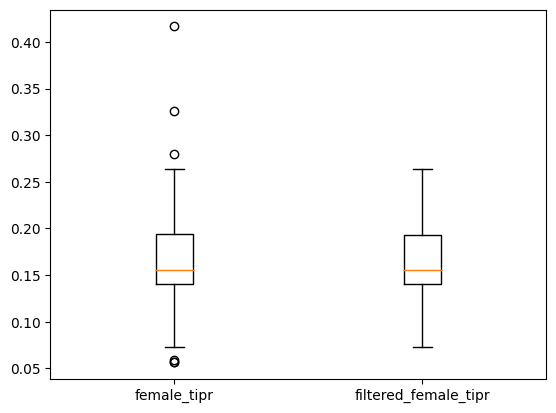

In [110]:
# 2つの箱ヒゲ図を描写
data = [female_tipr, filtered_female_tipr]

plt.boxplot(data, labels=['female_tipr', 'filtered_female_tipr'])